# Regression phase 7: Ridge Regression (gradient descent)

In this phase, we will implement ridge regression via gradient descent. 
Todos:

* Convert an SFrame into a Numpy array
* Write a Numpy function to compute the derivative of the regression weights with respect to a single feature
* Write gradient descent function to compute the regression weights given an initial weight vector, step size, tolerance, and L2 penalty

# Import graphlab

In [1]:
import graphlab

# Load in hotels data


In [19]:
hotels = graphlab.SFrame('NY0421-23.csv')
hotels['price'] = hotels['price'].astype(float)
# hotels['rates'] = hotels['rates'].astype(float)
hotels['zipcode'] = hotels['zipcode'].astype(float)

#hotels = hotels[hotels['size'] < 1500] 
hotels = hotels[hotels['price'] > 10]
hotels

Finished parsing file /Users/Peter/NY0421-23.csv

Parsing completed. Parsed 100 lines in 0.064981 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,int,float,float,str,str,str,str,int,int,str,int,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/Peter/NY0421-23.csv

Parsing completed. Parsed 5643 lines in 0.04114 secs.

name,zone,zipcode,star,rating,rates,checkin,checkout
Dumont NYC-an Affiniahotel ...,Midtown East - GrandCentral ...,10016.0,4.0,4.4,"2,991",04/21/2017,04/22/2017
Dumont NYC-an Affiniahotel ...,Midtown East - GrandCentral ...,10016.0,4.0,4.4,"2,991",04/21/2017,04/22/2017
Salisbury Hotel,Broadway - Times Square,10019.0,3.0,4.1,"14,936",04/21/2017,04/22/2017
Salisbury Hotel,Broadway - Times Square,10019.0,3.0,4.1,"14,936",04/21/2017,04/22/2017
"The Roosevelt Hotel, NewYork City ...",Midtown East - GrandCentral ...,10017.0,4.0,3.7,"19,170",04/21/2017,04/22/2017
"The Roosevelt Hotel, NewYork City ...",Midtown East - GrandCentral ...,10017.0,4.0,3.7,"19,170",04/21/2017,04/22/2017
"The Roosevelt Hotel, NewYork City ...",Midtown East - GrandCentral ...,10017.0,4.0,3.7,"19,170",04/21/2017,04/22/2017
"The Roosevelt Hotel, NewYork City ...",Midtown East - GrandCentral ...,10017.0,4.0,3.7,"19,170",04/21/2017,04/22/2017
"The Roosevelt Hotel, NewYork City ...",Midtown East - GrandCentral ...,10017.0,4.0,3.7,"19,170",04/21/2017,04/22/2017
YOTEL New York at TimesSquare ...,Midtown West,10036.0,4.0,4.3,"8,319",04/21/2017,04/22/2017


# Import useful functions from previous notebook


In [20]:
import numpy as np # note this allows us to refer to numpy as np instead
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1 # this is how we add a constant column to an SFrame
    # add the column 'constant' to the front of the features list so that we can extract it along with the others:
    features = ['constant'] + features # this is how we combine two lists
    # select the columns of data_SFrame given by the features list into the SFrame features_sframe (now including constant):
    features_sframe = data_sframe[features]
    # the following line will convert the features_SFrame into a numpy matrix:
    feature_matrix = features_sframe.to_numpy()
    # assign the column of data_sframe associated with the output to the SArray output_sarray
    output_sarray = data_sframe[output]
    # the following will convert the SArray into a numpy array by first converting it to a list
    output_array = output_sarray.to_numpy()
    return(feature_matrix, output_array)

Also, copy and paste the predict_output() function to compute the predictions for an entire matrix of features given the matrix and the weights:

In [21]:
def predict_output(feature_matrix, weights):
    # assume feature_matrix is a numpy matrix containing the features as columns and weights is a corresponding numpy array
    # create the predictions vector by using np.dot()
    predictions = np.dot(feature_matrix, weights)

    return(predictions)

# Computing the Derivative


We are now going to move to computing the derivative of the regression cost function. Recall that the cost function is the sum over the data points of the squared difference between an observed output and a predicted output, plus the L2 penalty term.

Cost(w)
= SUM[ (prediction - output)^2 ] + l2_penalty * (w[0]^2 + w[1]^2 + ... + w[k]^2).

Since the derivative of a sum is the sum of the derivatives, we can take the derivative of the first part (the RSS) as we did in the notebook for the unregularized case in Week 2 and add the derivative of the regularization part. As we saw, the derivative of the RSS with respect to w[i] can be written as:

2 * SUM[ error * [feature_i] ].

The derivative of the regularization term with respect to w[i] is:

2 * l2_penalty * w[i].

Summing both, we get 

2 * SUM[ error * [feature_i] ] + 2 * l2_penalty * w[i].
That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself, plus 2 * l2_penalty * w[i].

**We will not regularize the constant**. Thus, in the case of the constant, the derivative is just twice the sum of the errors (without the 2*l2_penalty*w[0] term).

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors, plus 2*l2_penalty*w[i].

With this in mind complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points). To decide when to we are dealing with the constant (so we don't regularize it) we added the extra parameter to the call feature_is_constant which we should set to True when computing the derivative of the constant and False otherwise.

In [22]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    # If feature_is_constant is True, derivative is twice the dot product of errors and feature
    if feature_is_constant == True:
        derivative = 2 * np.dot(errors, feature)
    # Otherwise, derivative is twice the dot product plus 2*l2_penalty*weight
    else:
        derivative = 2 * np.dot(errors, feature) + 2 * l2_penalty * weight
    return derivative

To test the feature derivartive:

In [23]:
(example_features, example_output) = get_numpy_data(hotels, ['size'], 'price') 
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights) 
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False)
print np.sum(errors*example_features[:,1])*2+20.
print ''

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True)
print np.sum(errors)*2.

12804314326.0
12804314326.0

31822674.0
31822674.0


# Gradient Descent


Now we will write a function that performs a gradient descent. The basic premise is simple. 

Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.

The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. This time we will set a maximum number of iterations and take gradient steps until we reach this maximum number. If no maximum number is supplied, the maximum should be set 100 by default. (Use default parameter values in Python.)

For each step in the gradient descent, we update the weight for each feature before computing our stopping criteria.


In [24]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    weights = np.array(initial_weights) # make sure it's a numpy array
    #while not reached maximum number of iterations:
    while max_iterations > 0:       
        # compute the predictions based on feature_matrix and weights using our predict_output() function
        predictions = predict_output(feature_matrix,weights)
        # compute the errors as predictions - output
        errors = predictions - output
        # from time to time, print the value of the cost function       
        for i in xrange(len(weights)): # loop over each weight
            # Recall that feature_matrix[:,i] is the feature column associated with weights[i]
            # compute the derivative for weight[i].
            #(Remember: when i=0, we are computing the derivative of the constant!)
            if i == 0:
                feature_is_constant = True
            else:
                feature_is_constant = False
            derivative = feature_derivative_ridge(errors,feature_matrix[:,i],weights[i],l2_penalty,feature_is_constant)
                
            # subtract the step size times the derivative from the current weight
            weights[i] = weights[i] - (step_size * derivative)
        max_iterations -= 1
    return weights

Visualizing effect of L2 penalty


The L2 penalty gets its name because it causes weights to have small L2 norms than otherwise. Let's see how large weights get penalized. Let us consider a simple model with 1 feature:


In [26]:
simple_features = ['size']
my_output = 'price'

Split the dataset into training set and test set. 


In [27]:
train_data,test_data = hotels.random_split(.8,seed=0)

In this part, we will only use 'size' to predict 'price'. Use the get_numpy_data function to get a Numpy versions of the data with only this feature, for both the train_data and the test_data.

In [28]:
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

Let's set the parameters for our optimization:


In [119]:
initial_weights = np.array([0., 0.])
step_size = 1e-12
max_iterations = 100000

First, let's consider no regularization. Set the l2_penalty to 0.0 and run the ridge regression algorithm to learn the weights of our model. 


In [120]:
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, 
                                                             initial_weights, step_size, 
                                                             0.0, max_iterations)
print simple_weights_0_penalty

[ 0.0174731   0.85856358]


Next, let's consider high regularization. Set the l2_penalty to 1e11 and run the ridge regression algorithm to learn the weights of the model. 

In [121]:
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, 
                                                             initial_weights, step_size, 
                                                             1e8, max_iterations)
print simple_weights_high_penalty

[ 0.05348716  0.72810508]


This code will plot the two learned models. (The blue line is for the model with no regularization and the red line is for the one with high regularization.)

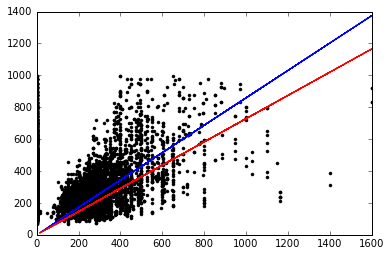

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix,output,'k.',
         simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

Compute the RSS on the TEST data for the following three sets of weights:

    1.The initial weights (all zeros)
    2.The weights learned with no regularization
    3.The weights learned with high regularization
    
Which weights perform best?

In [123]:
initial_predictions = predict_output(simple_test_feature_matrix, initial_weights)
initial_residuals = test_output - initial_predictions
initial_RSS = (initial_residuals **2).sum()
print initial_RSS

120132665.0


In [124]:
no_regularization_predictions = predict_output(simple_test_feature_matrix, simple_weights_0_penalty)
no_regularization_residuals = test_output - no_regularization_predictions
no_regularization_RSS = (no_regularization_residuals **2).sum()
print no_regularization_RSS

18929698.853


In [125]:
regularization_predictions = predict_output(simple_test_feature_matrix, simple_weights_high_penalty)
regularization_residuals = test_output - regularization_predictions
regularization_RSS = (regularization_residuals **2).sum()
print regularization_RSS

20864185.1464


# Running a multiple regression with L2 penalty


Let us now consider a model with 2 features: ['size', 'star'].

First, create Numpy versions of the training and test data with these two features.

In [126]:
model_features = ['size', 'star']
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

We need to re-inialize the weights, since we have one extra parameter. 
Let us also set the step size and maximum number of iterations.

In [127]:
initial_weights = np.array([0.0,0.0,0.0])
step_size = 1e-12
max_iterations = 100000

First, let's consider no regularization. Set the l2_penalty to 0.0 and run the ridge regression algorithm to learn the weights of the model.

In [128]:
multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, 
                                                               initial_weights, step_size, 
                                                               0.0, max_iterations)
print multiple_weights_0_penalty

[ 0.01744281  0.85761446  0.09605237]


Next, let's consider high regularization. Set the l2_penalty to 1e8 and run the ridge regression algorithm to learn the weights of the model. Call our weights:

In [129]:
multiple_weights_high_penalty = ridge_regression_gradient_descent(feature_matrix, output, 
                                                               initial_weights, step_size, 
                                                               1e8, max_iterations)
print multiple_weights_high_penalty

[ 0.05347605  0.72800681  0.01163195]


Compute the RSS on the TEST data for the following three sets of weights:

    1.The initial weights (all zeros)
    2.The weights learned with no regularization
    3.The weights learned with high regularization
    
Which weights perform best?

In [130]:
initial_predictions = predict_output(test_feature_matrix, initial_weights)
initial_residuals = test_output - initial_predictions
initial_RSS = (initial_residuals **2).sum()
print initial_RSS

120132665.0


In [131]:
no_regularization_predictions = predict_output(test_feature_matrix, multiple_weights_0_penalty)
no_regularization_residuals = test_output - no_regularization_predictions
no_regularization_RSS = (no_regularization_residuals **2).sum()
print no_regularization_RSS

18907949.5842


In [132]:
regularization_predictions = predict_output(test_feature_matrix, multiple_weights_high_penalty)
regularization_residuals = test_output - regularization_predictions
regularization_RSS = (regularization_residuals **2).sum()
print regularization_RSS

20861068.7102


Predict the hotel price for the 1st hotel in the test set using the no regularization and high regularization models.

In [133]:
print no_regularization_predictions[0]
print test_output[0] - no_regularization_predictions[0]

240.533702439
98.466297561


In [134]:
print regularization_predictions[0]
print test_output[0] - regularization_predictions[0]

203.941909981
135.058090019
